In [21]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;

%config InlineBackend.figure_format = 'retina'

main_data_path = '/Users/erezcohen/Desktop/data/BAND/AnalysisCSVfiles/'

# First look at BAND data 
For these files the beam energy should be 10409.6 MeV [https://clasweb.jlab.org/rcdb/runs/]

Apr-25, 2021 (EOC)

data files from:

/lustre19/expphy/cache/clas12/rg-b/production/recon/fall2019/torus+1/pass1/v1/dst/train/edeutcut/edeutcut_*.hipo

requirements in "Erez_CLAS12Reader.C"

In [11]:
events = pd.read_csv(main_data_path + "events_011265" + ".csv")

## Detected $\gamma$s in event
We look at the following events
$$ (e,e' p n \pi^+ \pi^-)$$
we require 1 e, 1 p, 1 n, 1 $\pi^+$, 1 $\pi^-$, and we do not pose any requirements on additional particles

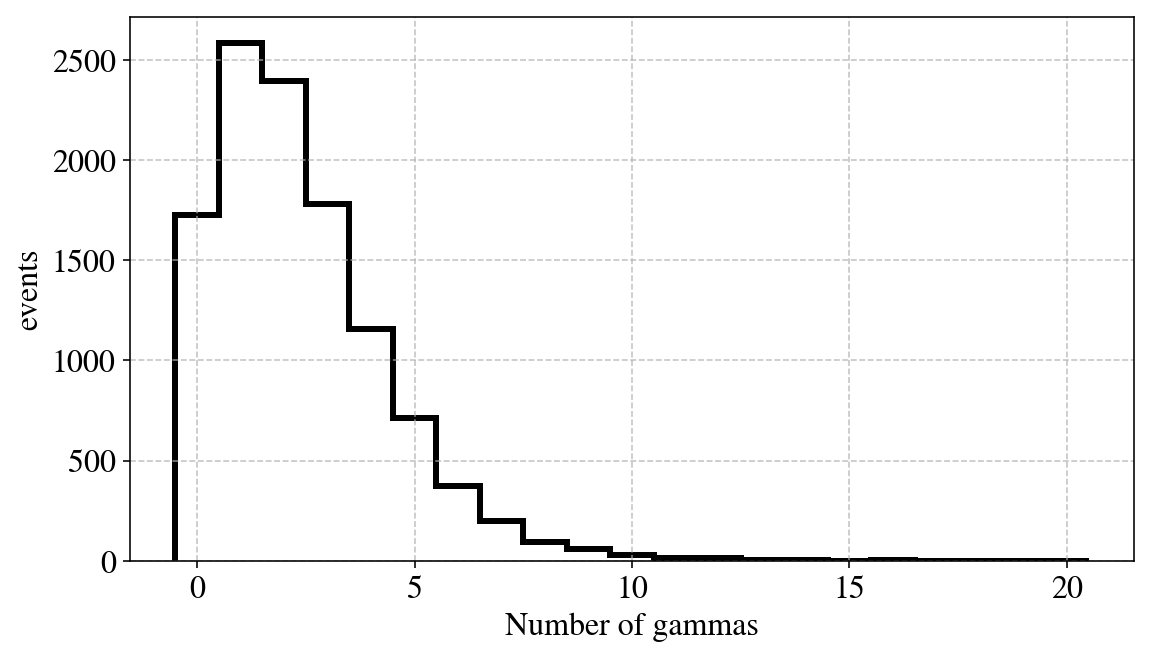

In [12]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
plot_discrete_histogram(events.Ngammas)
set_axes(ax,'Number of gammas','events',fontsize=16,do_add_grid=True);

## Outgoing electron

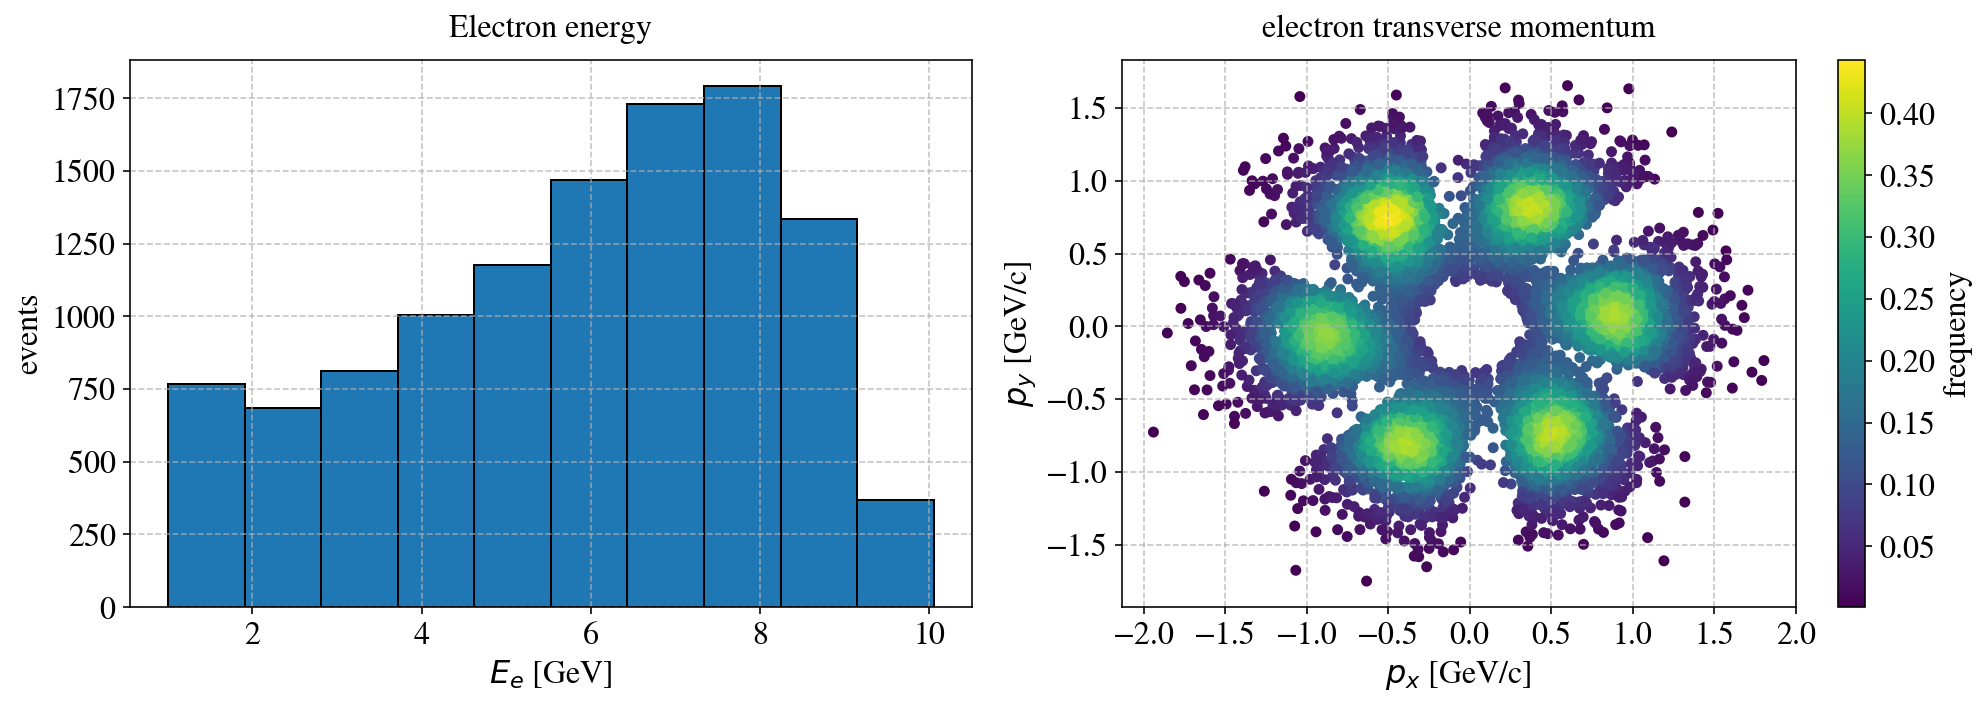

In [14]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1)
plt.hist(events.E_e,edgecolor='k')
set_axes(ax,'$E_e$ [GeV]','events',title='Electron energy',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(1,2,2)
scatter_plot_with_kernel(events.Pe_x, events.Pe_y, s=20, do_add_colorbar=True)
set_axes(ax,'$p_x$ [GeV/c]','$p_y$ [GeV/c]',title='electron transverse momentum',fontsize=16,do_add_grid=True);

plt.tight_layout()

## TBD: $\vec{p}_{miss}$, $\vec{q}$ (need incoming beam energy for this) and the FOMs we use for event selection cuts...

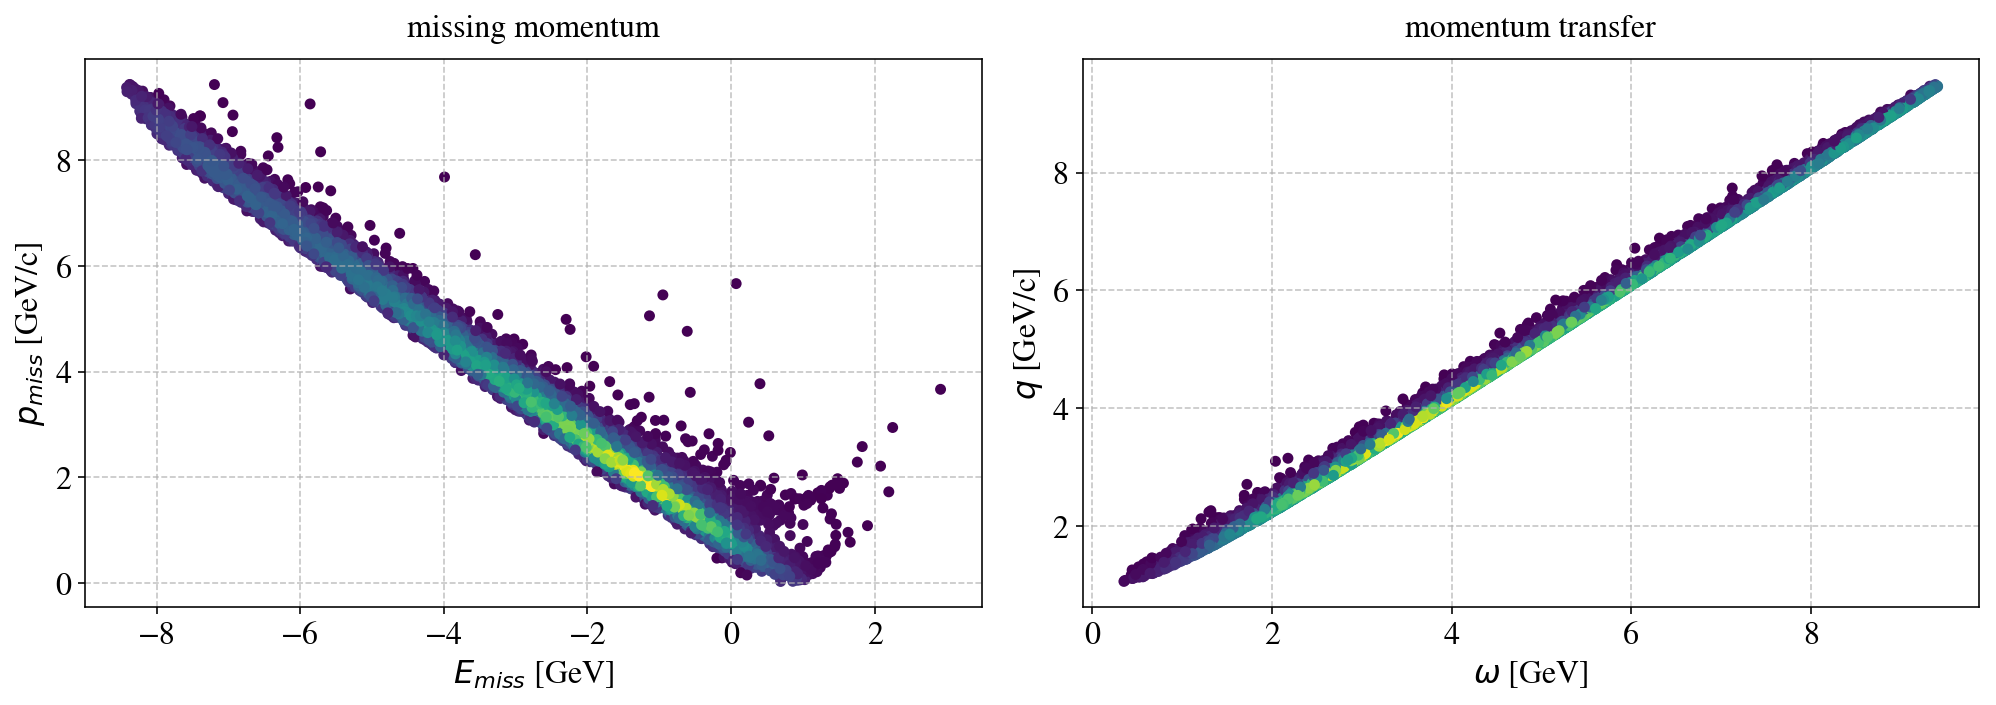

In [16]:
fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1,2,1)
scatter_plot_with_kernel(events.Emiss,
                         np.sqrt(np.square(events.Pmiss_x)+np.square(events.Pmiss_y)+np.square(events.Pmiss_z)), s=20)
set_axes(ax,'$E_{miss}$ [GeV]','$p_{miss}$ [GeV/c]',title='missing momentum',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(1,2,2)
scatter_plot_with_kernel(events.omega,np.sqrt(np.square(events.q_x)+np.square(events.q_y)+np.square(events.q_z)), s=20)
set_axes(ax,'$\omega$ [GeV]','$q$ [GeV/c]',
         title='momentum transfer',fontsize=16,do_add_grid=True);


plt.tight_layout()

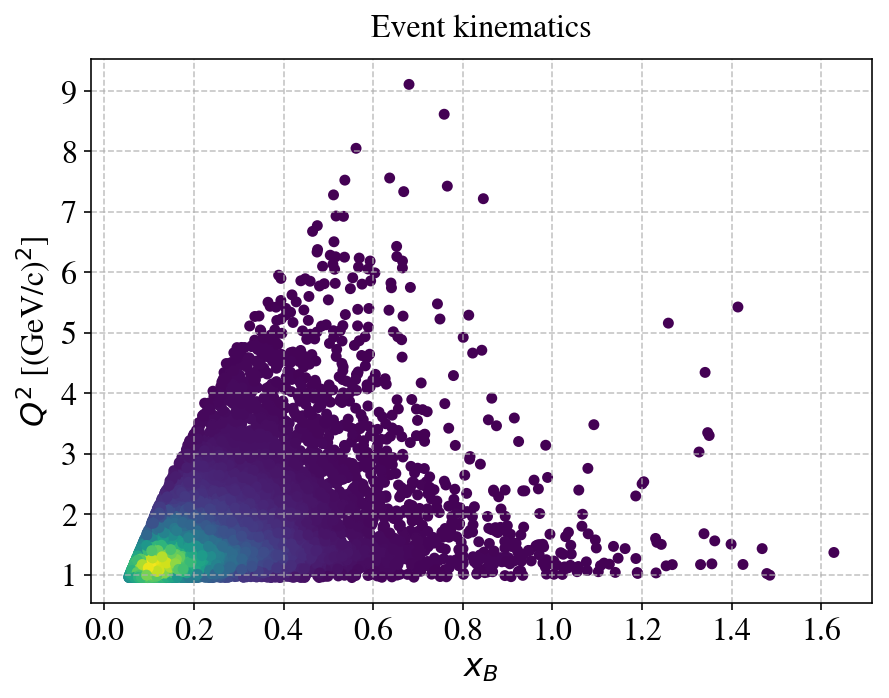

In [19]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(1,1,1)
scatter_plot_with_kernel(events.xB,events.Q2, s=20)
set_axes(ax,'$x_B$','$Q^2$ [(GeV/c)$^2$]',title='Event kinematics',fontsize=16,do_add_grid=True);


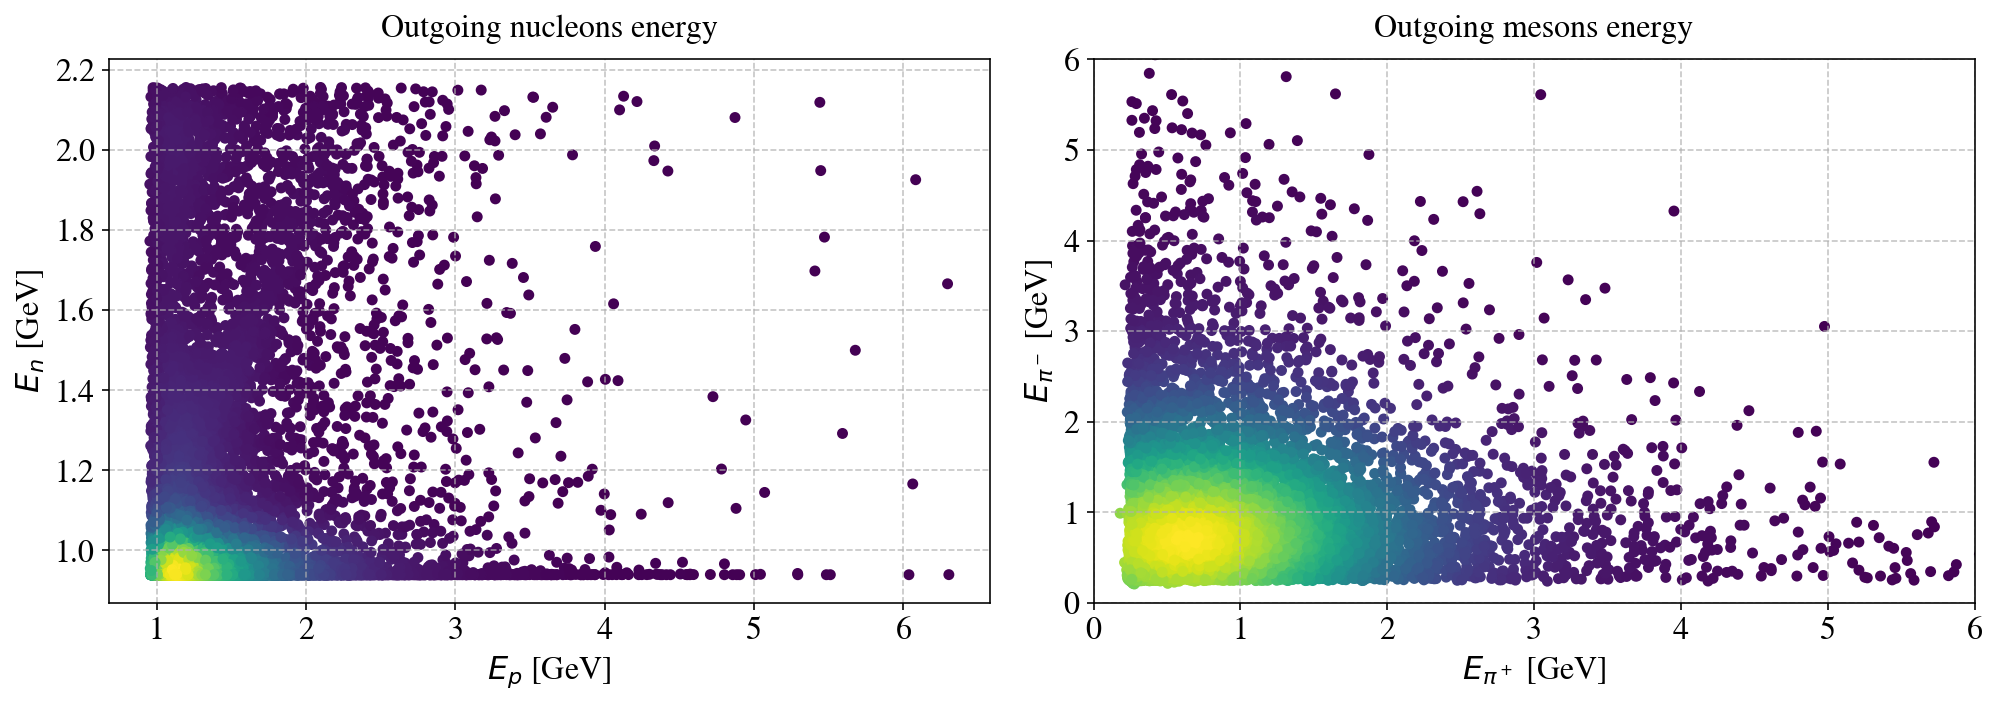

In [20]:
fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1,2,1)
scatter_plot_with_kernel(events.E_p,events.E_n, s=20)
set_axes(ax,'$E_p$ [GeV]','$E_n$ [GeV]',title='Outgoing nucleons energy',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(1,2,2)
scatter_plot_with_kernel(events.Epips,events.Epims, s=20)
set_axes(ax,'$E_{\pi^+}$ [GeV]','$E_{\pi^-}$ [GeV]',xlim=(0,6),ylim=(0,6),
         title='Outgoing mesons energy',fontsize=16,do_add_grid=True);


plt.tight_layout()